In [ ]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,accuracy_score
#!pip install visualkeras
import visualkeras
import random

Loading Data

In [ ]:
fashion_minist = keras.datasets.fashion_mnist
(images_train,labels_train),(images_test,labels_test) = fashion_minist.load_data()

Visualizing the Dataset

In [ ]:
#The labels consist of an array of integers that ranges from 0 to 9.
#The class names were not added to the dataset so we will add them.
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

Its a is : Dress


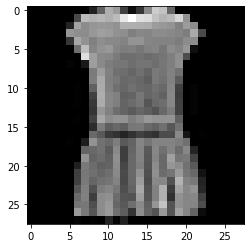

In [ ]:
#View an image of the training set
def view_images(index=0):
  img = images_train[index]
  print("Its a is :",class_names[index])
  plt.imshow(img,'gray')
  plt.show()

view_images(3)

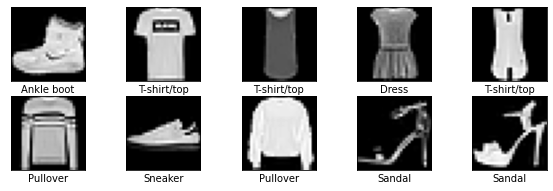

In [ ]:
plt.figure(figsize=(10, 3))  
i = 0
while i < 10:
    plt.subplot(2, 5, i+1)
    plt.imshow(images_train[i],'gray')
    plt.xlabel(class_names[labels_train[i]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    i = i+1
     
plt.show() 

Data PreProcessing

In [ ]:
#Normalizing Data
images_train = images_train / 255.0
images_test = images_test / 255.0

In [ ]:
#reshaping
images_train = images_train.reshape(images_train.shape[0],*(28,28,1))
images_test = images_test.reshape(images_test.shape[0],*(28,28,1))

Building the model

CNN

In [ ]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (28,28,1)),    #Convolution Layer
    keras.layers.MaxPooling2D(pool_size=2) ,  #Max Pooling to reduce the dimensions from 28*28 to 14*14
    keras.layers.Flatten(),             #converts the images from a 2-D array into a 1-D array
    keras.layers.Dense(32,activation='relu'),     #hidden layer
    keras.layers.Dense(10,activation = 'softmax')   #output layer
])

In [ ]:
#compiling the model
cnn.compile(loss ='sparse_categorical_crossentropy', optimizer= tf.optimizers.Adam(lr=0.001),metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Digram

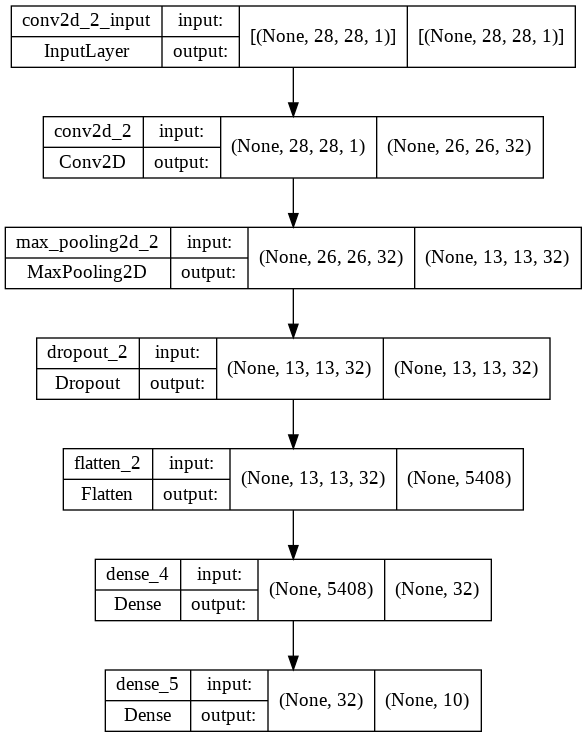

In [ ]:
tf.keras.utils.plot_model(cnn, show_shapes=True)

3D visualization of the model

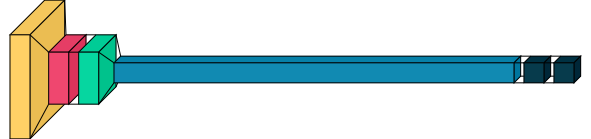

In [ ]:
visualkeras.layered_view(cnn)

Training Model

In [ ]:
model = cnn.fit(
    images_train,
    labels_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(images_test,labels_test),
)

Epoch 1/75
15/15 [==============================] - 22s 1s/step - loss: 1.7615 - accuracy: 0.4838 - val_loss: 1.1190 - val_accuracy: 0.6824
Epoch 2/75
15/15 [==============================] - 21s 1s/step - loss: 0.8544 - accuracy: 0.7283 - val_loss: 0.6867 - val_accuracy: 0.7538
Epoch 3/75
15/15 [==============================] - 22s 1s/step - loss: 0.6162 - accuracy: 0.7841 - val_loss: 0.5675 - val_accuracy: 0.7997
Epoch 4/75
15/15 [==============================] - 21s 1s/step - loss: 0.5273 - accuracy: 0.8167 - val_loss: 0.5119 - val_accuracy: 0.8190
Epoch 5/75
15/15 [==============================] - 22s 1s/step - loss: 0.4788 - accuracy: 0.8349 - val_loss: 0.4711 - val_accuracy: 0.8339
Epoch 6/75
15/15 [==============================] - 21s 1s/step - loss: 0.4443 - accuracy: 0.8471 - val_loss: 0.4460 - val_accuracy: 0.8391
Epoch 7/75
15/15 [==============================] - 21s 1s/step - loss: 0.4197 - accuracy: 0.8546 - val_loss: 0.4232 - val_accuracy: 0.8480
Epoch 8/75
15/15 [==

Evaluating the model

In [ ]:
s = cnn.evaluate(images_test,labels_test,verbose=0)
print('Test Loss : {:.4f}'.format(s[0]))
print('Test Accuracy : {:.4f} %'.format(s[1]*100))

Test Loss : 0.2584
Test Accuracy : 90.5800 %


In [ ]:
#make predictions
pred_probs = cnn.predict(images_test)
pred = pred_probs.argmax(axis=1)         # convert the prediction probabilities into int

Confusion Matrix

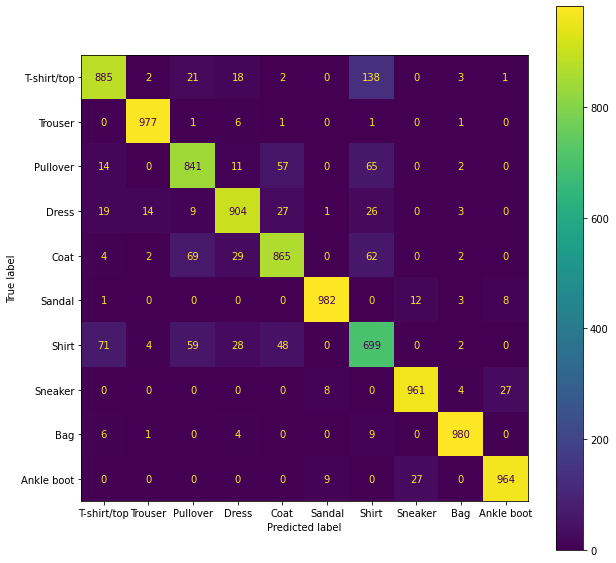

In [ ]:
cm = confusion_matrix(pred,labels_test)
p = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
p.plot(ax=ax);

In [ ]:
#classification report
print(classification_report(labels_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.84      0.85      1000
           3       0.90      0.90      0.90      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.70      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Visualizing predictions

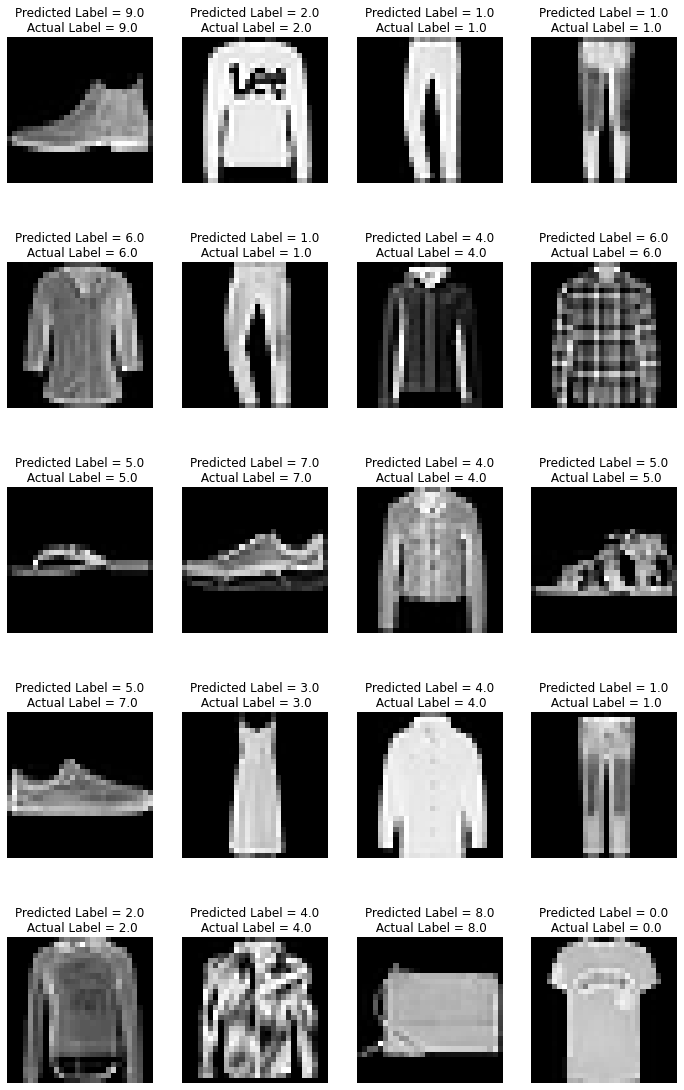

In [ ]:
fig, axes = plt.subplots(5,4, figsize = (12,20))
axes = axes.ravel()
for i in np.arange(20):  
    axes[i].imshow(images_test[i].reshape(28,28),'gray')
    axes[i].set_title(f"Predicted Label = {pred[i]:0.1f}\n Actual Label = {labels_test[i]:0.1f}")
    axes[i].axis('off')